# Project2 - Ioannis Mystakidis(sdi1600113) & Ioanna Karageorgou(sdi1600057)

In [61]:
import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline 

## Preprocessing

In [62]:
crimedata = pd.read_csv('crime.csv', delimiter = ',',skiprows=1, names=['incident_number','offense_code','offense_code_group','offense_description','district','reporting_area','shooting','occurred_on_date','year','month','day_of_week','hour','ucr_part','street','lat','long','location'],encoding = 'unicode_escape')
#Replace NaN values in the 'Shootings' column with 'N'
crimedata.isnull().sum()/crimedata.shape[0]
crimedata['shooting'].unique()
crimedata['shooting'] = crimedata['shooting'].fillna('N')
crimedata['shooting'].unique()

array(['N', 'Y'], dtype=object)

## 1. Παρουσιάστε τα γραφήματα που δείχνουν το πλήθος των εγκλημάτων ανά χρόνο, ανά μήνα και ανά ημέρα. Επίσης το πλήθος των εγκλημάτων ανά περιοχή (​DISTRICT)

Conclusions:
- From the first chart, we can see that the most crimes happened in 2017, rising steadily since 2015 and finally dropping in 2018 
- From the second chart, we see that crime rates peak during summer months and especially August
- From the third chart, we can see that August wasn't the most felonious month for all years, but since the most crimes happened on 2016 and 2017 (were crimes peaked in August), those were the years that impacted the above(2nd) chart and August came out as the most 'dangerous' month
- In the fourth chart, we see that Friday is a day that Boston citizens should be more careful than in any other day
- In the fifth chart, we see that 'B2' district is a dangerous place to live in compared to 'A15'
- From the sixth chart, we can verify the conclusion of the first chart for almost all districts i.e. crime rates were rising until 2017 and started falling in 2018
- The last chart shows us the most common crime types per district. We can see that residents of 'D4' districts should really keep an eye on their stuff and motorcycle accidents are quite common all around Boston

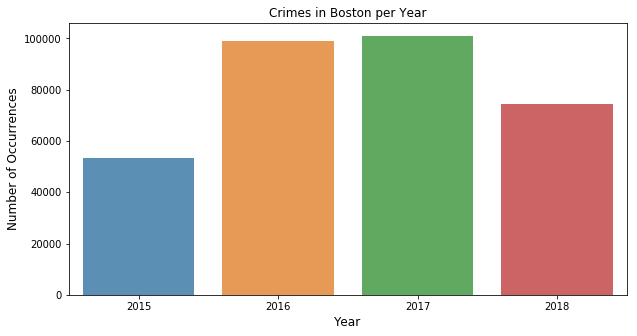

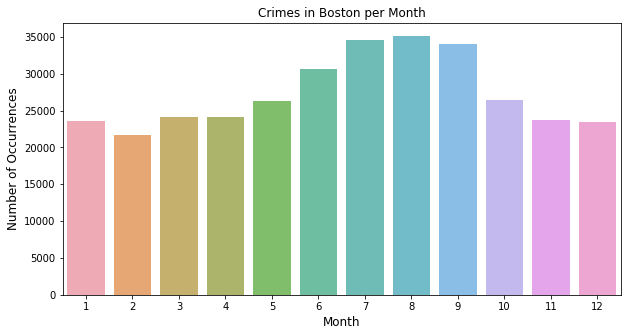

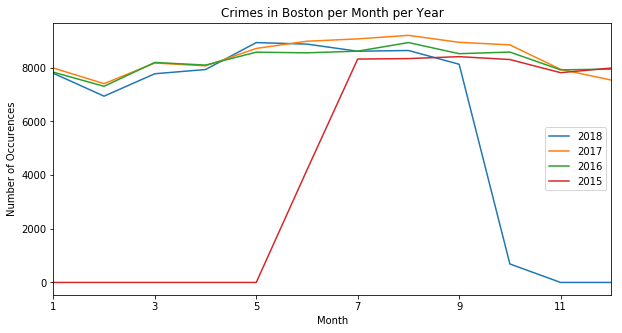

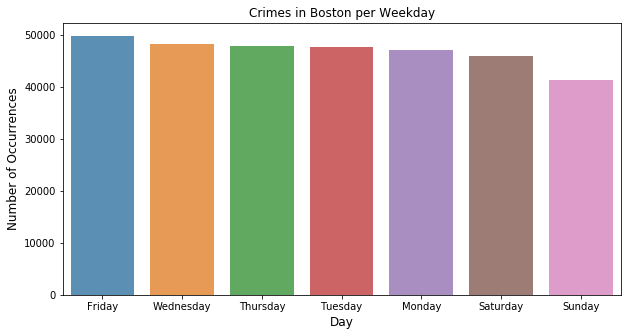

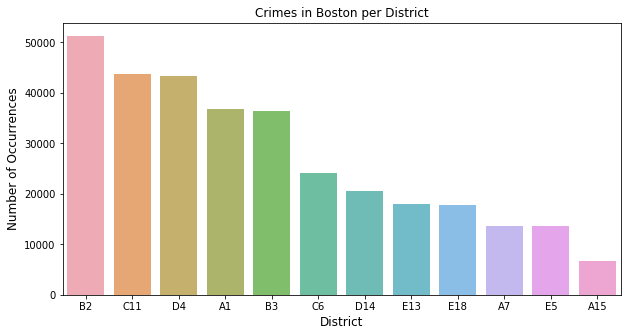

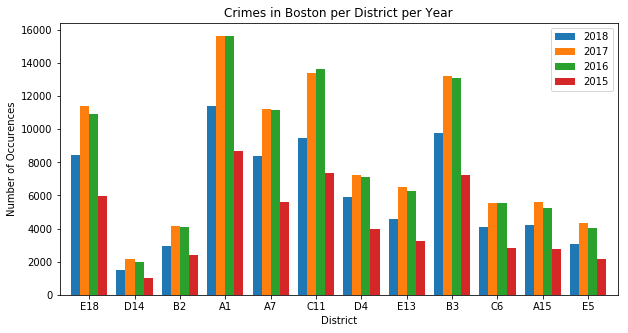

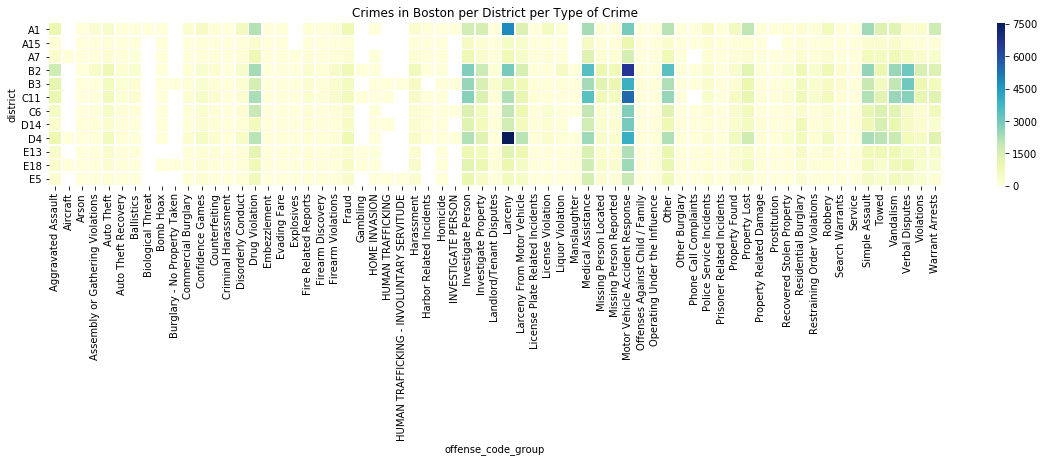

In [63]:
#Crimes in Boston per Year
crimedata['year'].groupby([crimedata['year']]).agg('count')

year_count  = crimedata['year'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(year_count.index, year_count.values, alpha=0.8)
plt.title('Crimes in Boston per Year')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()
# -------------------------------------------

#Crimes in Boston per Month
crimedata['month'].groupby([crimedata['month']]).agg('count')

month_count  = crimedata['month'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(month_count.index, month_count.values, alpha=0.8)
plt.title('Crimes in Boston per Month')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()
#----------------------------------------------

# Crimes per Month per Year
gre_data = crimedata['incident_number'].groupby([crimedata['month'], crimedata['year']]).count() #groupBy month and year
temp_data = gre_data
s_data = temp_data.unstack(level=-1)

#print(s_data)
for i in range(s_data.shape[0]):       #Replace NaN values with 0.0
    if pd.isnull(s_data[2015][i+1]):
        s_data[2015][i+1] = 0
    if pd.isnull(s_data[2018][i+1]):
        s_data[2018][i+1] = 0        
#print(s_data)

crimes2018 = list(s_data[2018])
crimes2017 = list(s_data[2017])
crimes2016 = list(s_data[2016])
crimes2015 = list(s_data[2015])
#crimesALL = list(s_data[2015] + s_data[2016] + s_data[2017] + s_data[2018])  'ALL-Years':crimesALL
index = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] #months
df = pd.DataFrame({'2018': crimes2018, '2017': crimes2017, '2016':crimes2016, '2015':crimes2015}, index=index)
df.plot(figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Number of Occurences")
plt.title("Crimes in Boston per Month per Year")
plt.show()
# ------------------------------------------------------

#Crimes in Boston per Day_of_Week
crimedata['day_of_week'].groupby([crimedata['day_of_week']]).agg(['count'])
day_count  = crimedata['day_of_week'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(day_count.index, day_count.values, alpha=0.8)
plt.title('Crimes in Boston per Weekday')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.show()
# ----------------------------------------------

#Crimes in Boston per District
crimedata['district'].groupby([crimedata['district']]).agg('count')

district_count  = crimedata['district'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(district_count.index, district_count.values, alpha=0.8)
plt.title('Crimes in Boston per District')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('District', fontsize=12)
plt.show()
#-----------------------------------------------------------

#Crimes in Boston per District per Year
group_data = crimedata['incident_number'].groupby([crimedata['district'],crimedata['year']]).agg('count')

temp_data = group_data
s_data = temp_data.unstack(level=-1)
crimes2018 = list(s_data[2018])
crimes2017 = list(s_data[2017])
crimes2016 = list(s_data[2016])
crimes2015 = list(s_data[2015])
index = ['E18', 'D14', 'B2', 'A1', 'A7', 'C11', 'D4', 'E13', 'B3', 'C6', 'A15', 'E5']
df = pd.DataFrame({'2018': crimes2018, '2017': crimes2017, '2016':crimes2016, '2015':crimes2015}, index=index)
df.plot.bar(figsize=(10,5),rot=0, width=0.8)
plt.xlabel("District")
plt.ylabel("Number of Occurences")
plt.title("Crimes in Boston per District per Year")
plt.show()
# ---------------------------------------------------------------

#Crimes in Boston per District per Type of Crime
gre_data = crimedata['incident_number'].groupby([crimedata['district'], crimedata['offense_code_group']]).count()
temp_data = gre_data
s_data = temp_data.unstack(level=-1)
#print(s_data)
plt.figure(figsize=(20,3))
plt.title("Crimes in Boston per District per Type of Crime")
ax = sns.heatmap(s_data,linewidths=.5,cmap="YlGnBu")
#------------------------------------


## 2. Μελετήστε τα δεδομένα χρησιμοποιώντας την στήλη Shootings. Ποια χρονιά έχουμε τα περισσότερα shootings ; Σε ποια περιοχή (​DISTRICT) ​εμφανίζονται τα περισσότερα περιστατικά shootings ;

Conclusions:
- The pie chart shows us that the majority of 'shootings' took place in 2016 & 2017, which is quite reasonable considering those were the most felonious years
- From the second chart, we can see that the percentage of shootings that took place is pretty low compared to all the crimes commited and it was mostly prevalent in districts 'B2','B3','C11'
- The third chart shows us that shootings take place mostly during summer and a good amount of them during December (Holidays it is!)

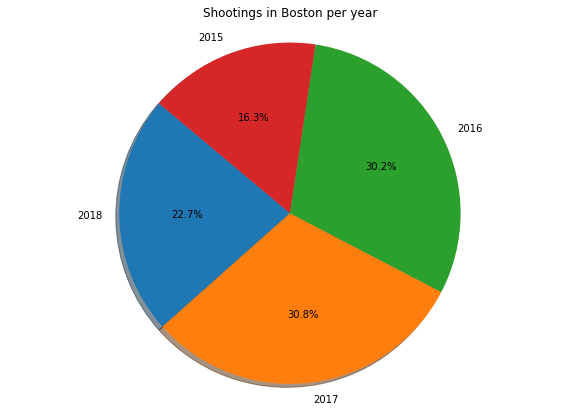

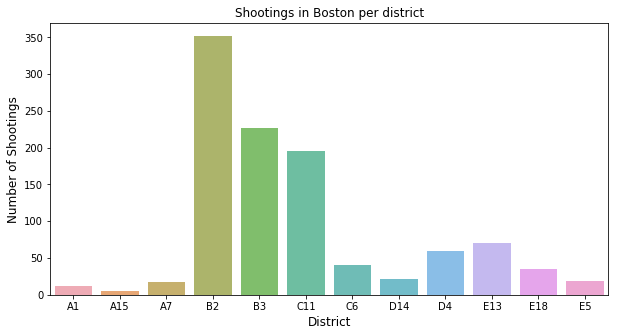

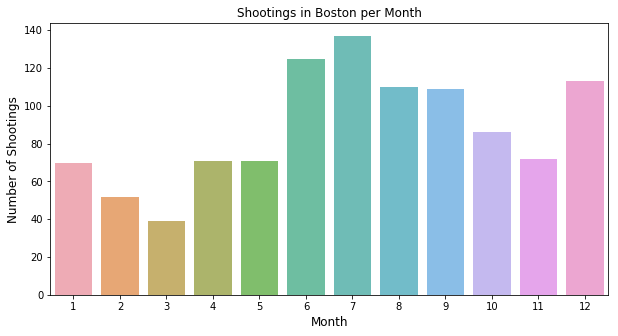

In [64]:
#shootings per Year
group_data = crimedata['shooting'].groupby([crimedata['year']]).agg('count')

years = crimedata['year'].unique()
i = 0
numOfShootings = list()
while i < len(years):
    numOfShootings.append(len(crimedata.loc[crimedata['year'] == years[i]]))
    i += 1
    
plt.figure(figsize=(10,7))
plt.pie(numOfShootings,      #make a pie
    labels=years,
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140)

plt.axis('equal')
plt.title("Shootings in Boston per year")
plt.show()
# --------------------------------------------------------------

#Shootings per District
group_data = crimedata['incident_number'].groupby([crimedata['shooting'],crimedata['district']]).agg('count')
#print(group_data)
group_data = group_data['Y']
plt.figure(figsize=(10,5))
sns.barplot(group_data.index, group_data.values, alpha=0.8)
plt.title('Shootings in Boston per district')
plt.ylabel('Number of Shootings', fontsize=12)
plt.xlabel('District', fontsize=12)
plt.show()
# ----------------------------------------------------------------

#Shootings per Month
group_data = crimedata['incident_number'].groupby([crimedata['shooting'],crimedata['month']]).agg('count')
#print(group_data)
group_data = group_data['Y']
plt.figure(figsize=(10,5))
sns.barplot(group_data.index, group_data.values, alpha=0.8)
plt.title('Shootings in Boston per Month')
plt.ylabel('Number of Shootings', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()
# ----------------------------------------------------------------


## 3. Χρησιμοποιήστε την πληροφορία από τη στήλη ‘HOUR’ και φτιάξτε μία καινούρια στήλη που αντιπροσωπεύει την πληροφορία “Day or Night”. Αν η ώρα είναι μεταξύ 18:00 μμ - 06:00 πμ θεωρούμε ότι είναι νύχτα, αλλιώς θεωρούμε ότι είναι μέρα. Είναι περισσότερα τα εγκλήματα την ημέρα ή τη νύχτα ;
## &
## 4. Συνδιάστε την νέα στήλη που προέκυψε (Day or Night) με την στήλη “OFFENSE_CODE_GROUP“ και απαντήστε στην ερώτηση : Ποιος είναι ο πιο συχνός τύπος εγκλήματος που συμβαίνει την ημέρα ;

Conclusions:
- The pie chart shows us that most crimes happen during Daytime
- The heatmap shows us that the most common incident taking place during Daytime is 'Motor Vehicle Accident Response' (and we can see the most common crime during Nighttime as well as the most common moment of the day for each type of crime)

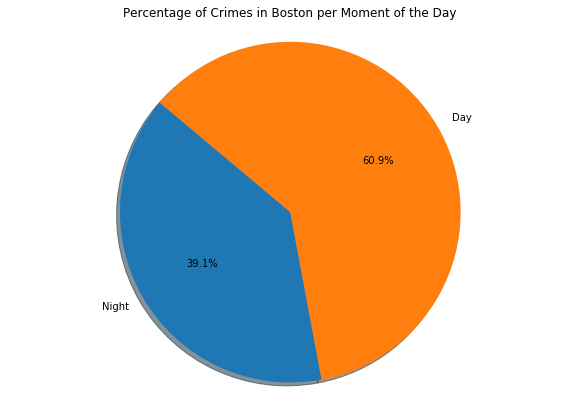

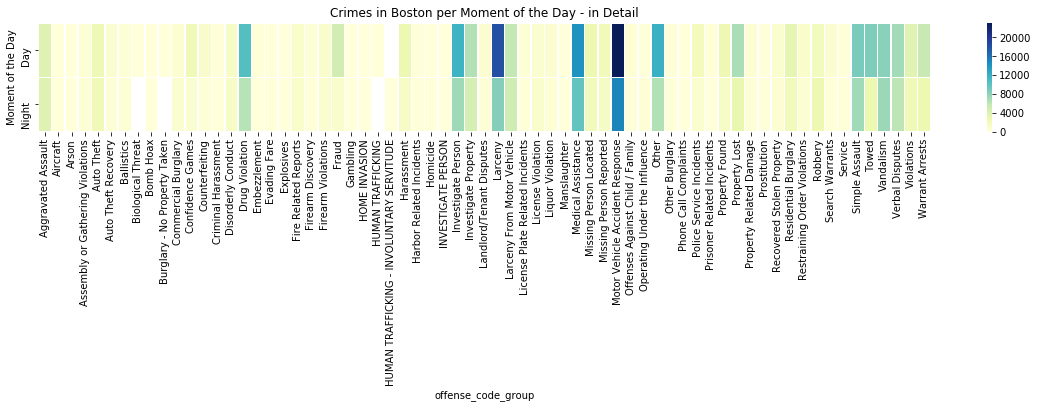

In [65]:
#Crimes in Boston per Moment of the Day - QUESTION 3
crimedata['Moment of the Day'] = 'Empty';
for i in range(len(crimedata)):           # Add a new Day or Night column
    if (crimedata['hour'][i] >= 18 and crimedata['hour'][i] <= 24) or (crimedata['hour'][i] >= 1 and crimedata['hour'][i] <= 6):
        crimedata.at[i,'Moment of the Day'] = 'Night'
    else:
        crimedata.at[i,'Moment of the Day'] = 'Day'

#print(crimedata['Moment of the Day'].unique())

h_data = crimedata['incident_number'].groupby([crimedata['Moment of the Day']]).agg('count')
D_or_N = crimedata['Moment of the Day'].unique()
i = 0
numOfIncidents = list()
while i < len(D_or_N):
    numOfIncidents.append(len(crimedata.loc[crimedata['Moment of the Day'] == D_or_N[i]]))
    i += 1
    
plt.figure(figsize=(10,7))
plt.pie(numOfIncidents,      #make a pie
    labels=D_or_N,
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140)

plt.title("Percentage of Crimes in Boston per Moment of the Day")
plt.axis('equal')
plt.show()
# --------------------------------------------------------------------------

#Crimes in Boston per Moment of the Day - in Detail  - QUESTION 4
gre_data = crimedata['incident_number'].groupby([crimedata['Moment of the Day'], crimedata['offense_code_group']]).agg('count')
temp_data = gre_data
s_data = temp_data.unstack(level=-1)
#print(s_data)
plt.figure(figsize=(20,2))
plt.title("Crimes in Boston per Moment of the Day - in Detail")
ax = sns.heatmap(s_data,linewidths=.5,cmap="YlGnBu")
# ----------------------------------------------------------------------------

## 5. Χρησιμοποιώντας τις στήλες Lat και Log και την βιβλιοθήκη KMeans θα εφαρμόσετε clustering με βάση την γεωγραφική τοποθεσία. Δοκιμάστε τον KMeans με 2,3,5,10 clusters. Στη συνέχεια συνδιάστε περισσότερες στήλες από τα δεδομένα σας και εφαρμόστε το clustering, δηλαδή με (location, OFFENSE_CODE) και (location, MONTH).

5.1 - > Clustering using (LOCATION) only

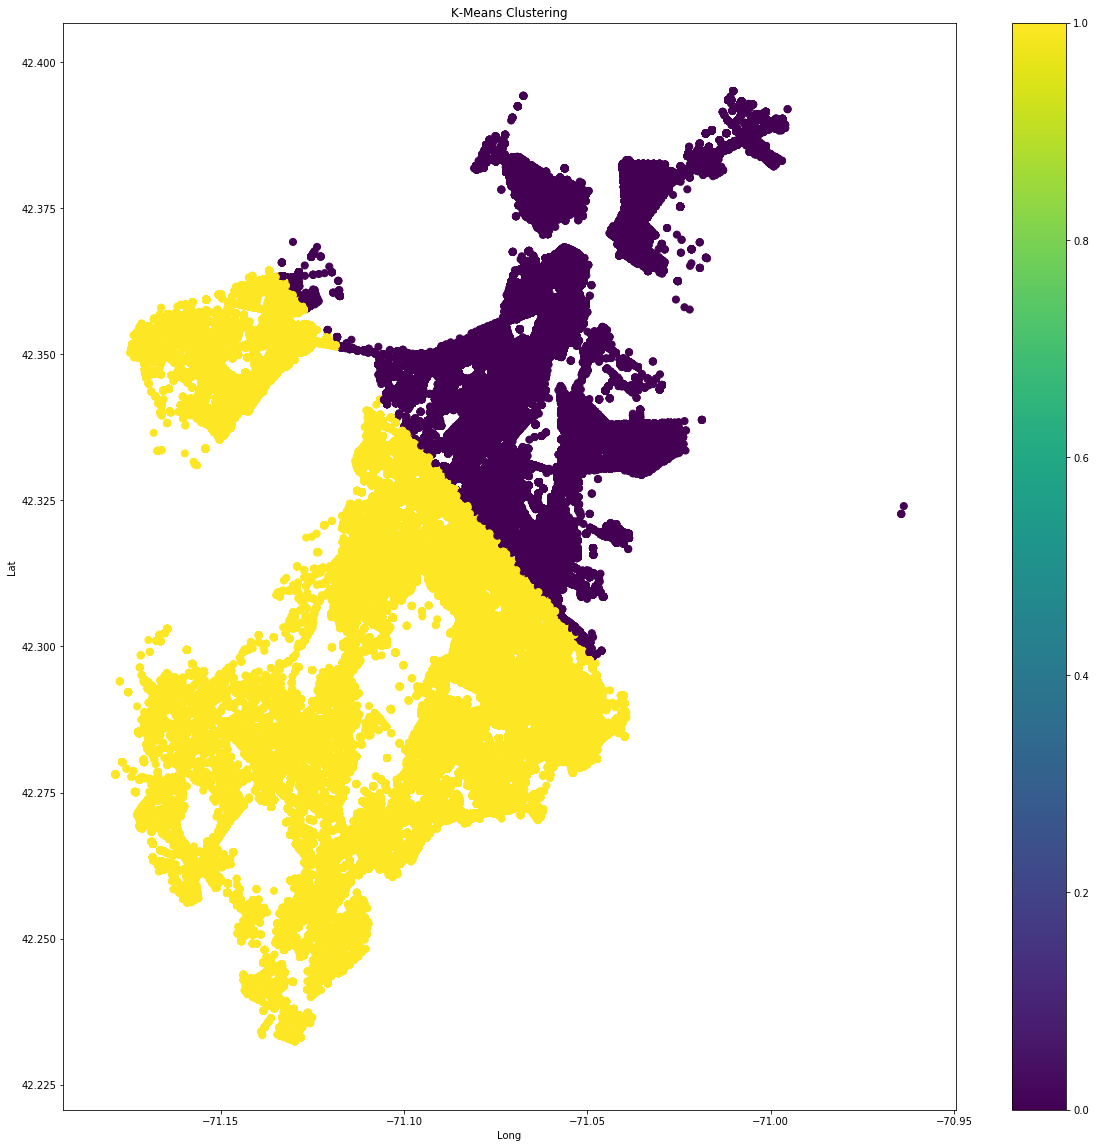

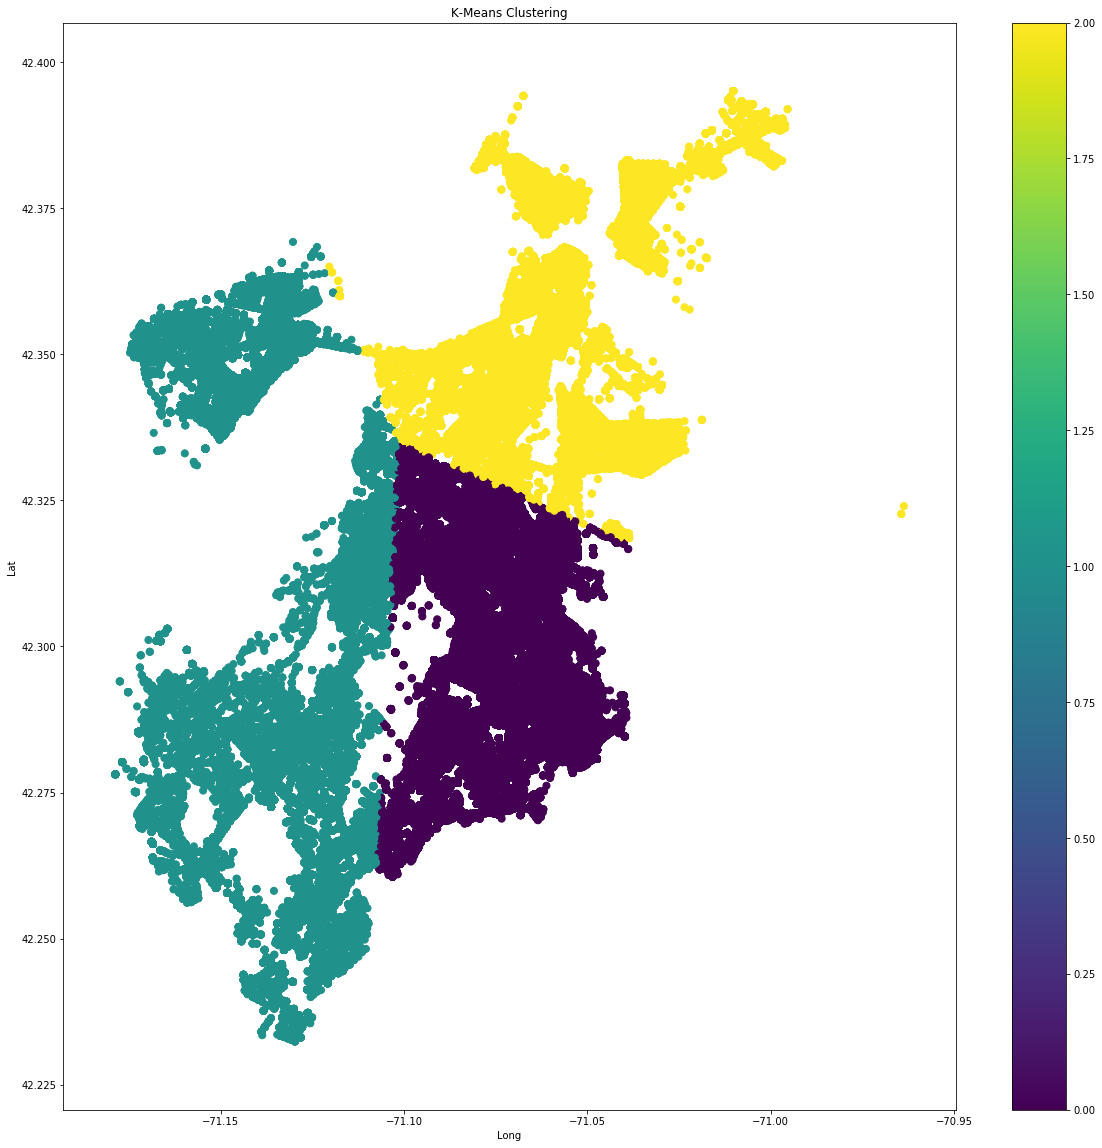

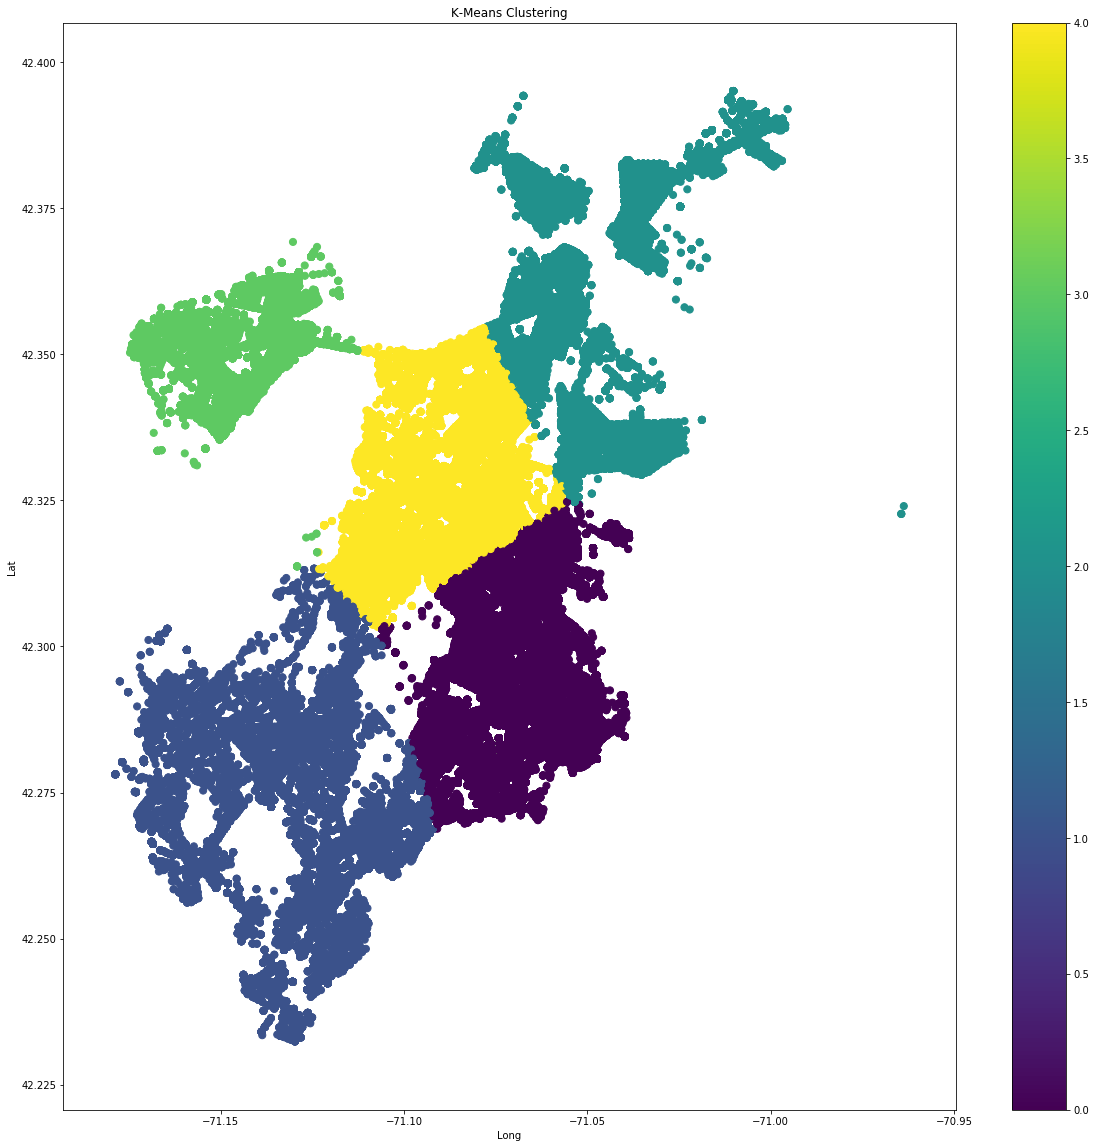

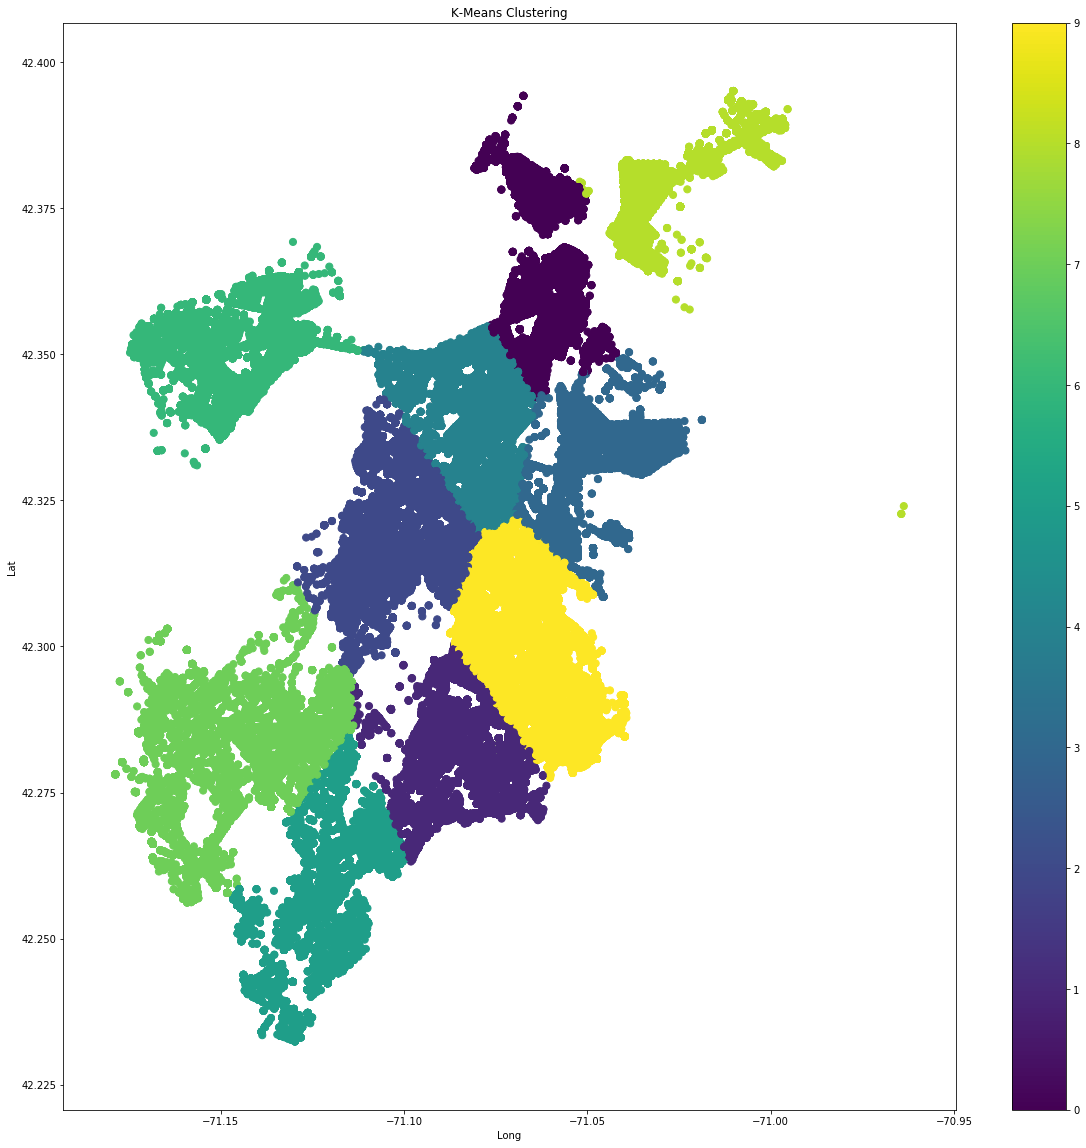

In [66]:
# Clustering using Location -> k=2
temp_df = crimedata[['lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 2)
km.fit(temp_df)
labels = km.predict(temp_df)

labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)



#Plot the clusters obtained using k means 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
#--------------------------------------------------------

# Clustering using Location -> k=3
temp_df = crimedata[['lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 3)
km.fit(temp_df)
labels = km.predict(temp_df)


labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)


#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
#----------------------------------------------------------

# Clustering using Location -> k=5
temp_df = crimedata[['lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 5)
km.fit(temp_df)
labels = km.predict(temp_df)

labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)

#Plot the clusters obtained using k means 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
#----------------------------------------------------------

# Clustering using Location -> k=10
temp_df = crimedata[['lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 10)
km.fit(temp_df)
labels = km.predict(temp_df)

labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)

#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
# -----------------------------------------------------------

5.2 -> Clustering using (location, OFFENSE_CODE)

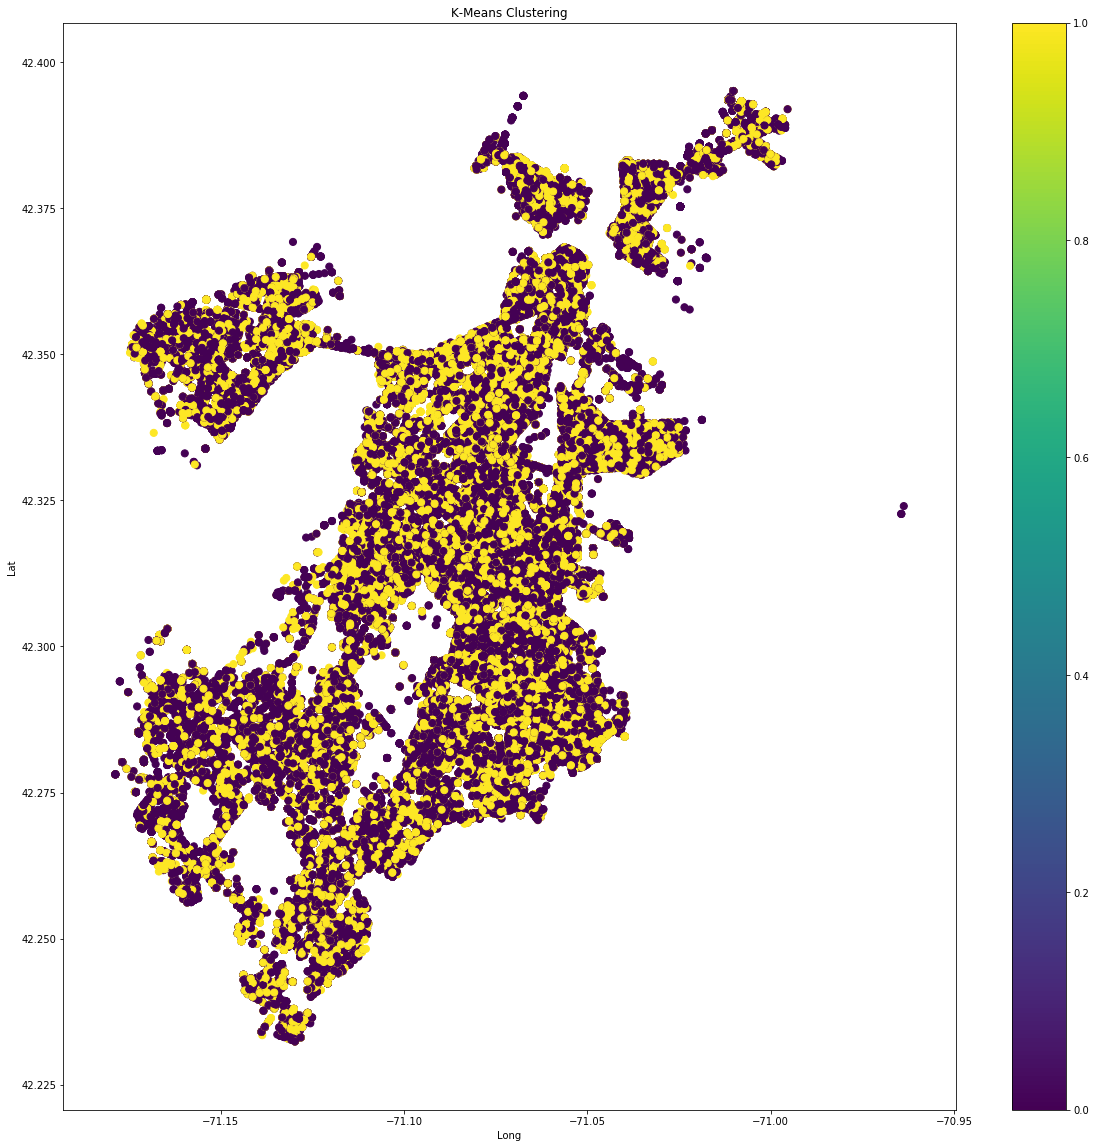

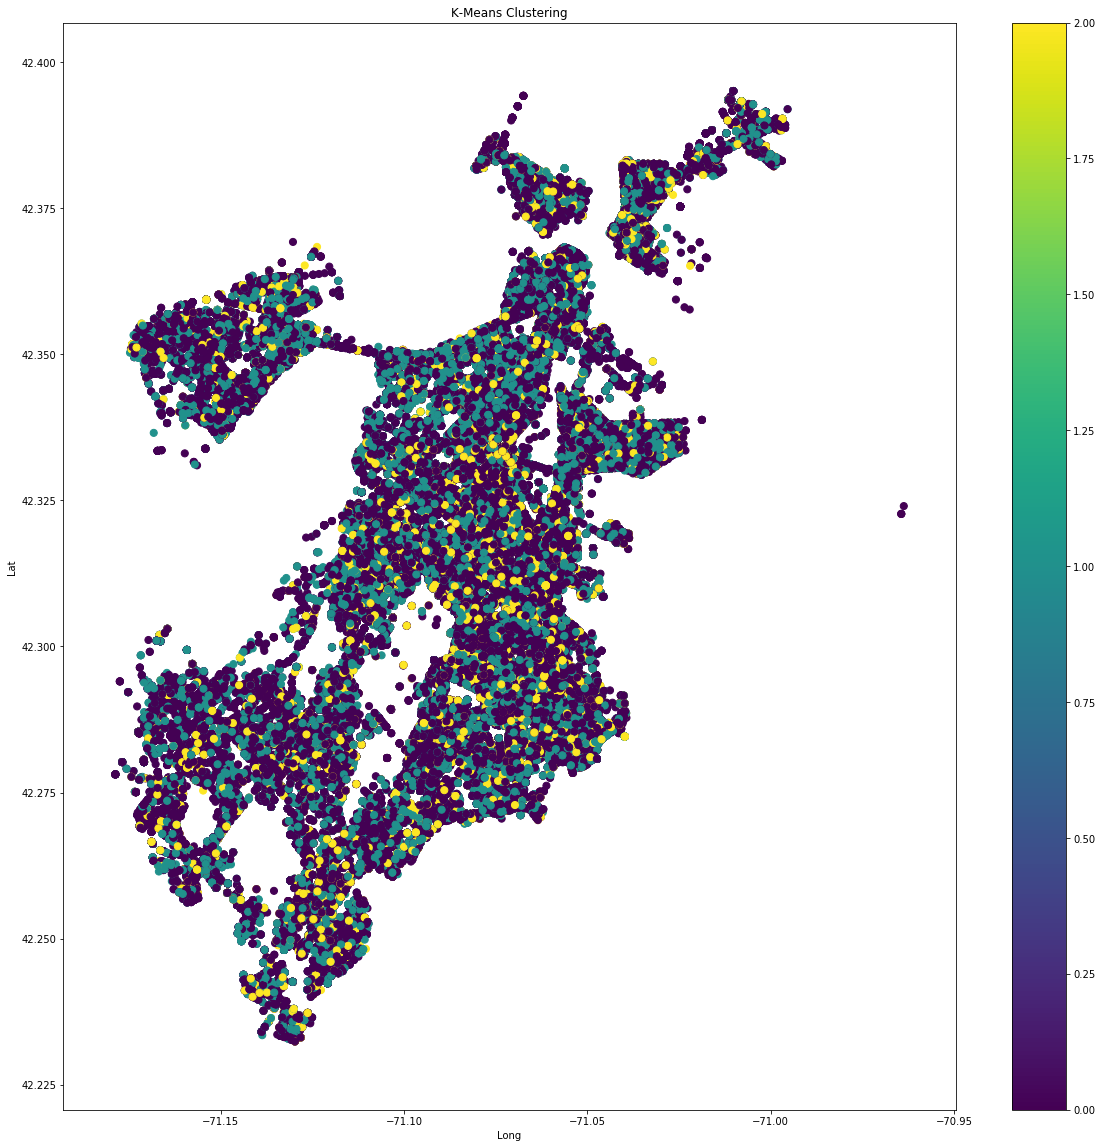

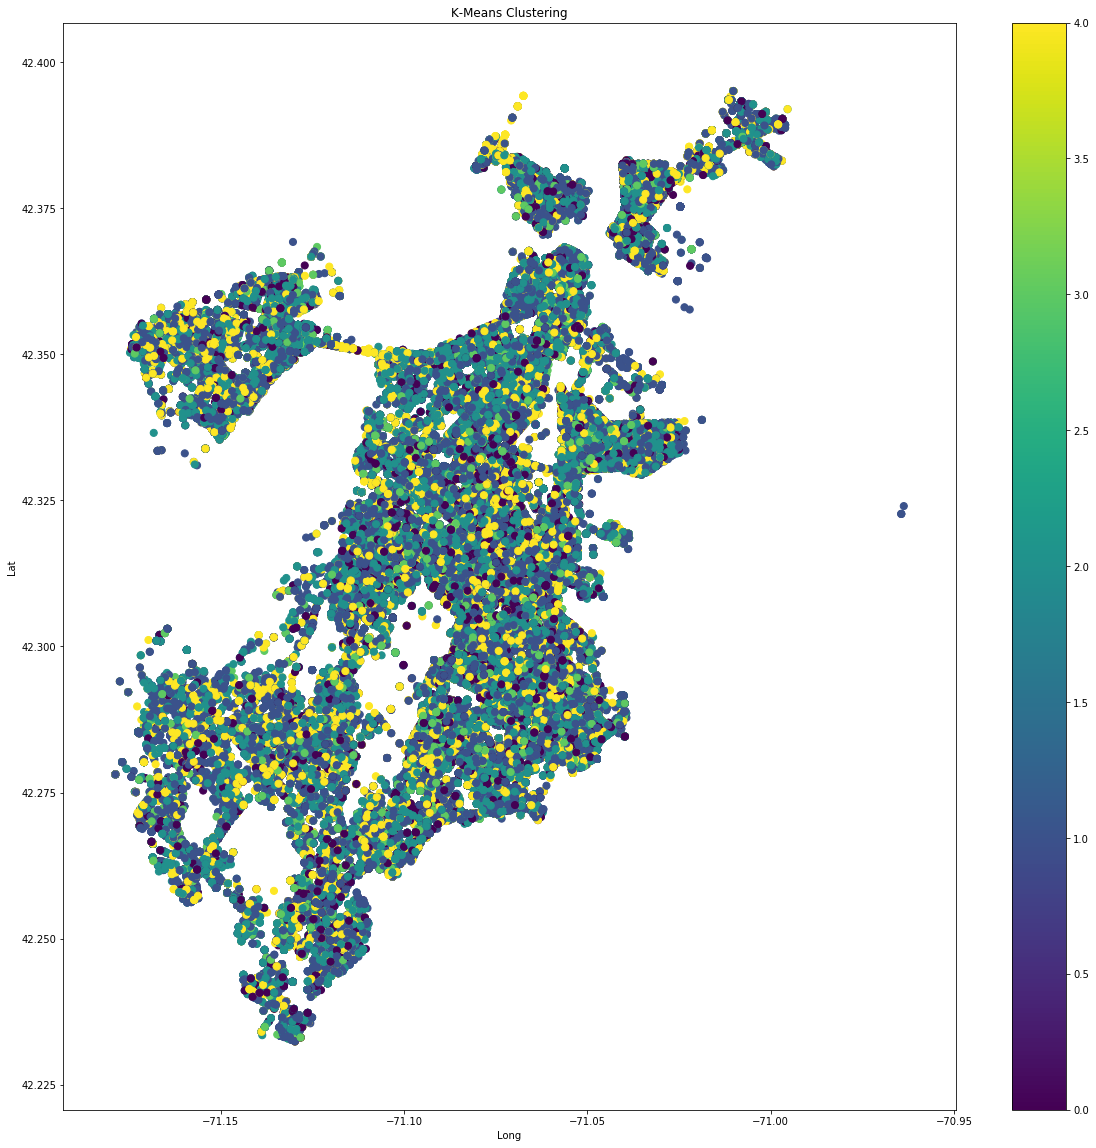

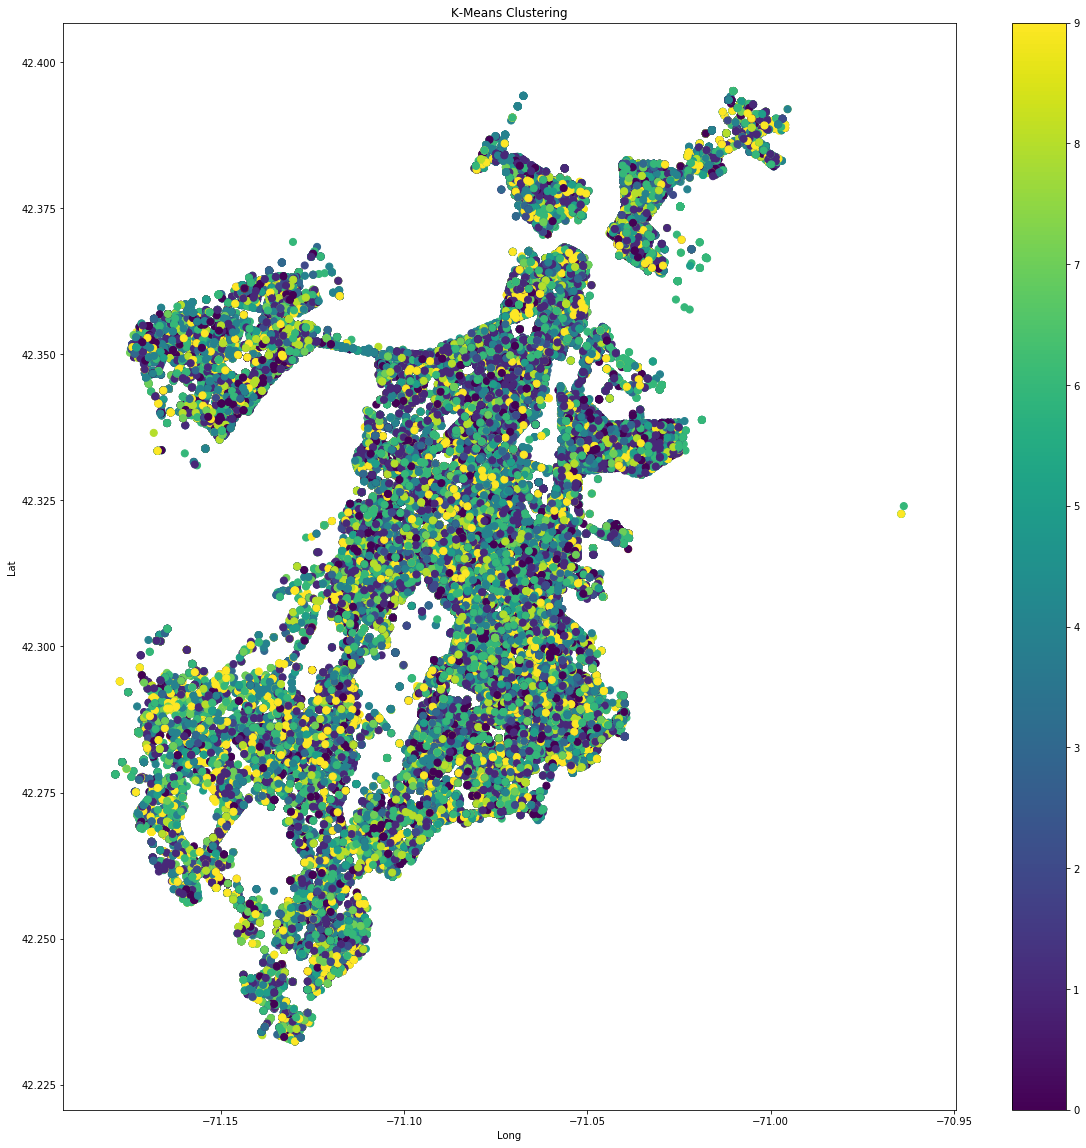

In [67]:
# Clustering using Location,Offense_code -> k=2
temp_df = crimedata[['offense_code','lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 2)
km.fit(temp_df)
labels = km.predict(temp_df)

labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)

#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
#--------------------------------------------------------

# Clustering using Location,Offense_code -> k=3
temp_df = crimedata[['offense_code','lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 3)
km.fit(temp_df)
labels = km.predict(temp_df)


labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)


#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
#----------------------------------------------------------

# Clustering using Location,Offense_code -> k=5
temp_df = crimedata[['offense_code','lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 5)
km.fit(temp_df)
labels = km.predict(temp_df)

labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)

#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
#----------------------------------------------------------

# Clustering using Location,Offense_code -> k=10
temp_df = crimedata[['offense_code','lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 10)
km.fit(temp_df)
labels = km.predict(temp_df)

labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)

#Plot the clusters obtained using k means 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
# ---------------------------------------------------------

5.3 -> Clustering using (location, MONTH)

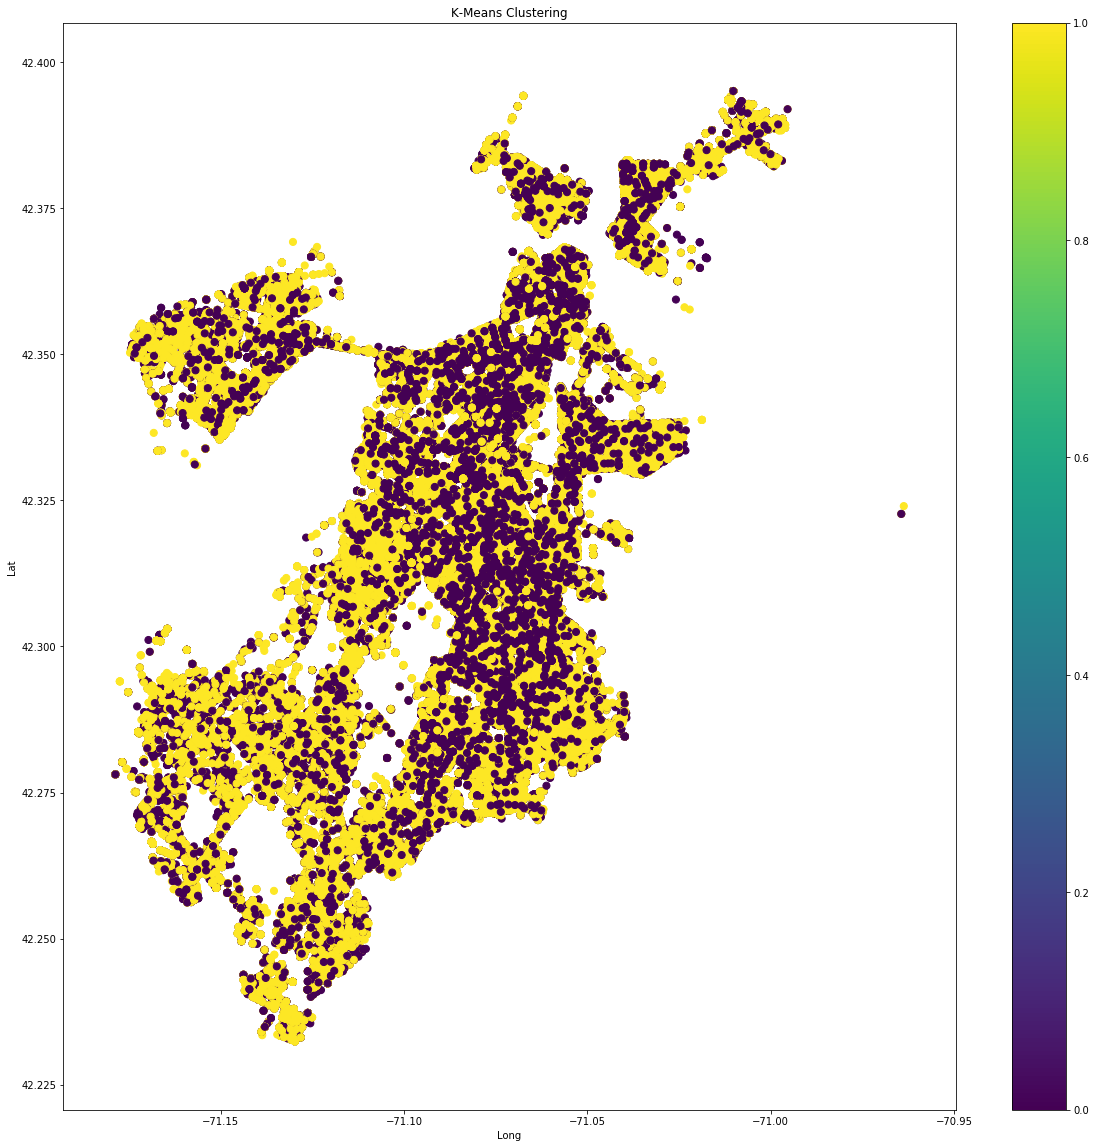

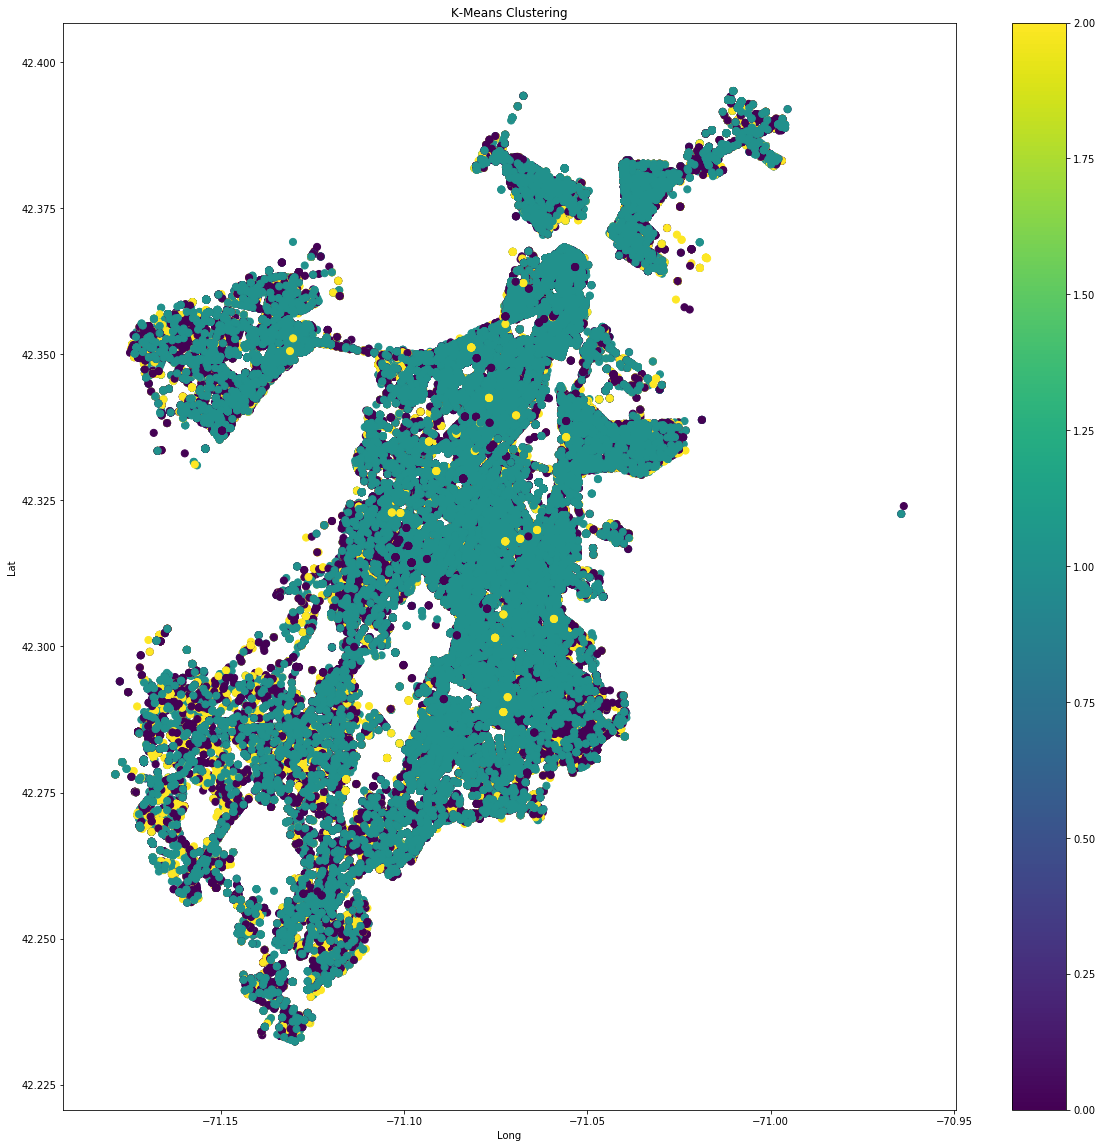

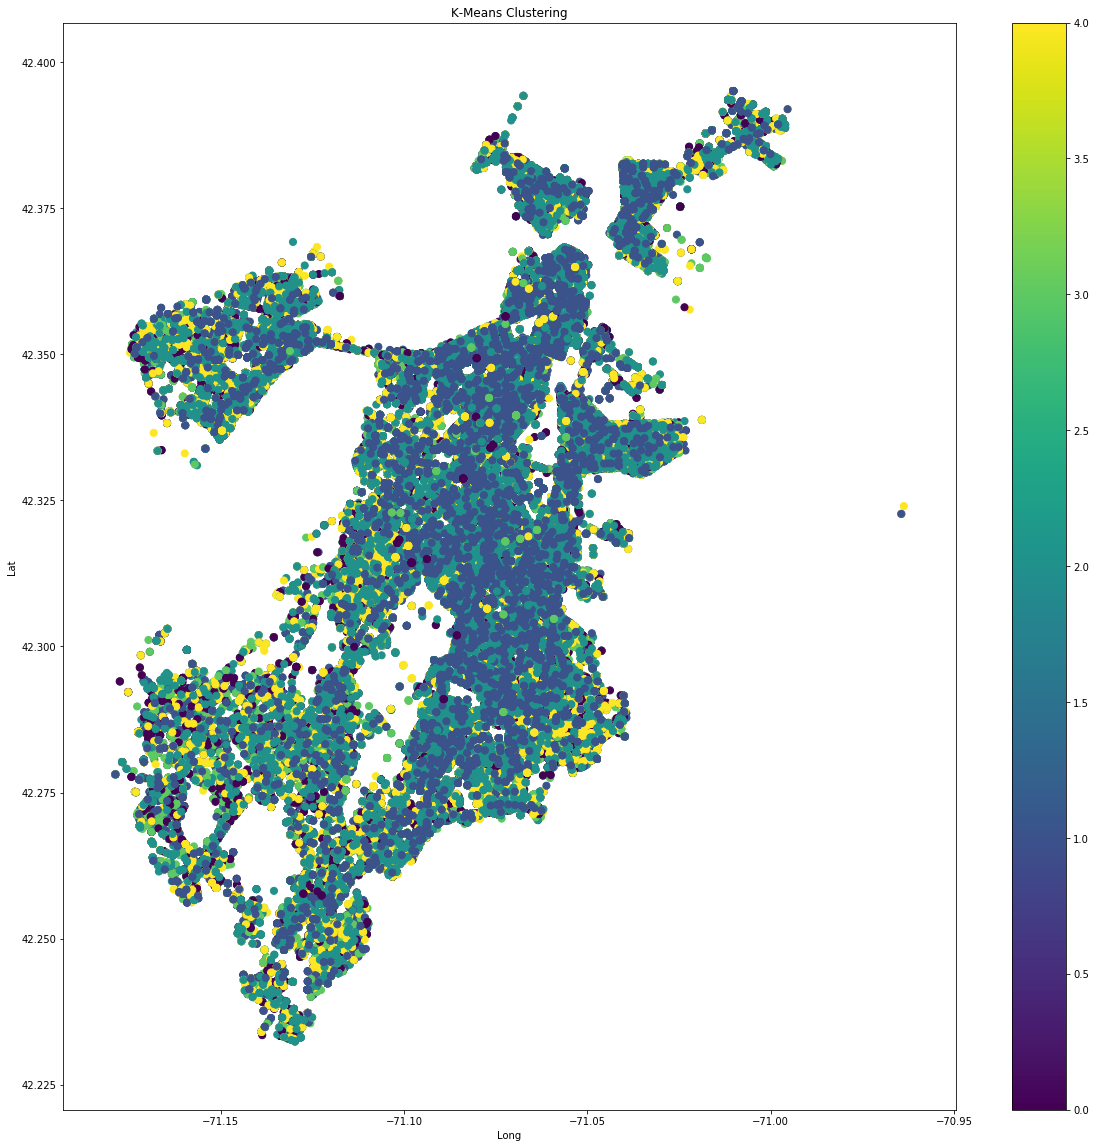

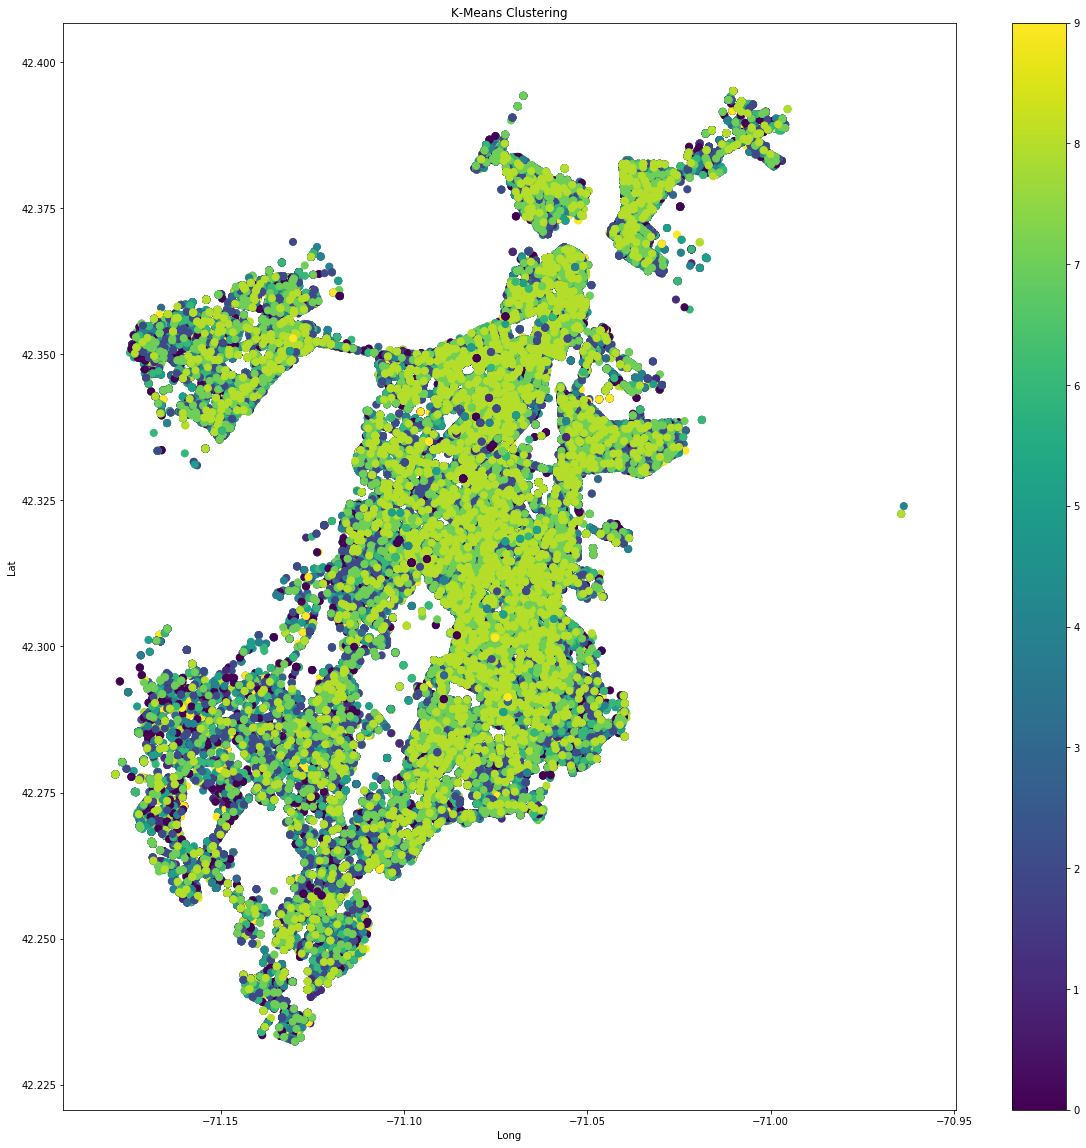

In [68]:
# Clustering using Location,Month -> k=2
temp_df = crimedata[['month','lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 2)
km.fit(temp_df)
labels = km.predict(temp_df)

labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)

#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
#--------------------------------------------------------

# # Clustering using Location,Month -> k=3
temp_df = crimedata[['month','lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 3)
km.fit(temp_df)
labels = km.predict(temp_df)


labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)


#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
#----------------------------------------------------------

# # Clustering using Location,Month -> k=5
temp_df = crimedata[['month','lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 5)
km.fit(temp_df)
labels = km.predict(temp_df)

labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)

#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
#----------------------------------------------------------

# # Clustering using Location,Month -> k=10
temp_df = crimedata[['month','lat','long']]
temp_df = temp_df.dropna()

temp_df = temp_df[temp_df.lat != -1.0]

#K means Clustering
km = KMeans(n_clusters = 10)
km.fit(temp_df)
labels = km.predict(temp_df)

labels = pd.DataFrame(labels)
temp_df.insert((temp_df.shape[1]),'Labels',labels)

#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(temp_df['long'],temp_df['lat'],
                     c=labels[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)
# --------------------------------------------------------

## Bonus: Χρησιμοποιώντας τη βιβλιοθήκη folium φτιάξτε έναν interactive χάρτη όπου θα φαίνονται clusters για ένα συγκεκριμένο περιστατικό (για παράδειγμα επιλέγουμε τις γραμμές που έχουν ως περιστατικό “Drug Violation” από τη στήλη OFFENSE_CODE_GROUP) (hint: χρησιμοποιήστε το MarkerCluster plugin και τη στήλη “location”)


In [69]:
# Prepare the Data
temp_df = crimedata
temp_df = crimedata.loc[crimedata['offense_code_group'] == "Drug Violation"] # Keep only the Drug Violation Occurrencies
temp_df = temp_df.dropna(subset=['lat', 'long']) # Drop rows that have NaN values (BUT only in columns 'lat' and 'long')
#print(temp_df)

# Display ALL Drug Violations - Using fastMarkerCluster (it loses some of the functionality)
some_map = folium.Map(location=[42.28981486, -71.11767828], zoom_start=12) #location=[temp_df['lat'].mean(), temp_df['long'].mean()]

callback = ('function (row) {' 
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red",  radius: 10000});'
                'return circle};')

some_map.add_child(FastMarkerCluster(temp_df[['lat', 'long']].values.tolist(), callback=callback))
some_map
# ------------------------------------------------------------------------------------------

In [70]:
# Display Drug Violations - 500 random occurencies, using marketCluster
temp_df = temp_df.sample(n=500)
some_map = folium.Map(location=[42.32848705, -71.08152784], zoom_start=12)
mc = MarkerCluster()
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in temp_df.itertuples():
    mc.add_child(folium.Marker(location=[row.lat,  row.long],
                 popup=row.incident_number))
 
some_map.add_child(mc)
some_map
# -----------------------------------------------

In [71]:
# Display incidents of 3 crime types in district 'D4'
temp_df = crimedata.loc[(crimedata['district']=='D4') & ((crimedata['offense_code_group'] == "Larceny") | (crimedata['offense_code_group'] == "Harassment") | (crimedata['offense_code_group'] == "Auto Theft"))] # Keep only the Drug Violation Occurrencies
temp_df = temp_df.dropna(subset=['lat', 'long'])
#grab a random sample from df
subset_of_df = temp_df.sample(n=200)
#creating a map that’s centered to our sample
some_map = folium.Map(location=[subset_of_df["lat"].mean(), 
                                subset_of_df["long"].mean()], 
                                zoom_start=14)

def color(tp):             #function for resolving color based on type of crime
    if tp == 'Larceny':
        col = 'green'
    elif tp == 'Harassment':
        col = 'blue'
    else:
        col = 'red'
    return col

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in subset_of_df.itertuples():
    some_map.add_child(folium.Marker(location=[row.lat,
         row.long], popup=row.incident_number,
         icon=folium.Icon(color=color(row.offense_code_group), 
                          prefix='fa', icon='circle')))
    
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; left: 50px; width: 200px; height: 120px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; <strong> Type of Crime</strong> <br>
                              &nbsp; <em>Larceny</em> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
                              &nbsp; <em>Harassment</em> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
                              &nbsp; <em>Auto Theft</em> &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i>
                </div>
                ''' 
some_map.get_root().html.add_child(folium.Element(legend_html))
some_map
# --------------------------------------------------------------------------------------------------